In [1]:
#decision tree analysys
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv(r"Spotify_Youtube.csv")
# List of required columns
required_columns = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
                   'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
                   'Duration_ms', 'Stream']

# Filter the DataFrame
df_filtered = df[required_columns]

# Show the first 5 rows of the filtered dataset
print(df_filtered.head())


   Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
0         0.818   0.705   6.0    -6.679       0.1770      0.008360   
1         0.676   0.703   8.0    -5.815       0.0302      0.086900   
2         0.695   0.923   1.0    -3.930       0.0522      0.042500   
3         0.689   0.739   2.0    -5.810       0.0260      0.000015   
4         0.663   0.694  10.0    -8.627       0.1710      0.025300   

   Instrumentalness  Liveness  Valence    Tempo  Duration_ms        Stream  
0          0.002330    0.6130    0.772  138.559     222640.0  1.040235e+09  
1          0.000687    0.0463    0.852   92.761     200173.0  3.100837e+08  
2          0.046900    0.1160    0.551  108.014     215150.0  6.306347e+07  
3          0.509000    0.0640    0.578  120.423     233867.0  4.346636e+08  
4          0.000000    0.0698    0.525  167.953     340920.0  6.172597e+08  


In [3]:
median_value = int(df_filtered['Stream'].median())
print(median_value)

49682981


In [4]:
df_filtered.loc[:, 'Stream_Above_Median'] = (df_filtered['Stream'] > df_filtered['Stream'].median()).astype(int)


C:\Users\Tomo\AppData\Local\Temp\ipykernel_24684\296786582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Stream_Above_Median'] = (df_filtered['Stream'] > df_filtered['Stream'].median()).astype(int)


In [12]:
# final data frame
df_filtered

#later refered to as df1

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream,Stream_Above_Median
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09,1
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08,1
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07,1
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08,1
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06,0
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07,0
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06,0
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06,0


In [13]:
#target variable = 'Stream_Above_Median'

df1 = df_filtered

In [15]:
df1['Stream_Above_Median'].describe()

count    20140.000000
mean         0.499950
std          0.500012
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Stream_Above_Median, dtype: float64

In [14]:
print(df1.isnull().sum())

Danceability           0
Energy                 0
Key                    0
Loudness               0
Speechiness            0
Acousticness           0
Instrumentalness       0
Liveness               0
Valence                0
Tempo                  0
Duration_ms            0
Stream                 0
Stream_Above_Median    0
dtype: int64


In [10]:
df1 = df1.dropna(inplace=True)

C:\Users\Tomo\AppData\Local\Temp\ipykernel_24684\706790753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1 = df1.dropna(inplace=True)


In [16]:
features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']
y = df1['Stream_Above_Median']
X = df1[features]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) # 70% training and 30% test

In [18]:
drzewo1 = DecisionTreeClassifier()

In [19]:
drzewo1.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred_train = drzewo1.predict(X_train)

In [21]:
accuracy_train = drzewo1.predict(X_train)
print(accuracy_train)

[1 0 1 ... 1 1 1]


In [22]:
from sklearn.model_selection import train_test_split

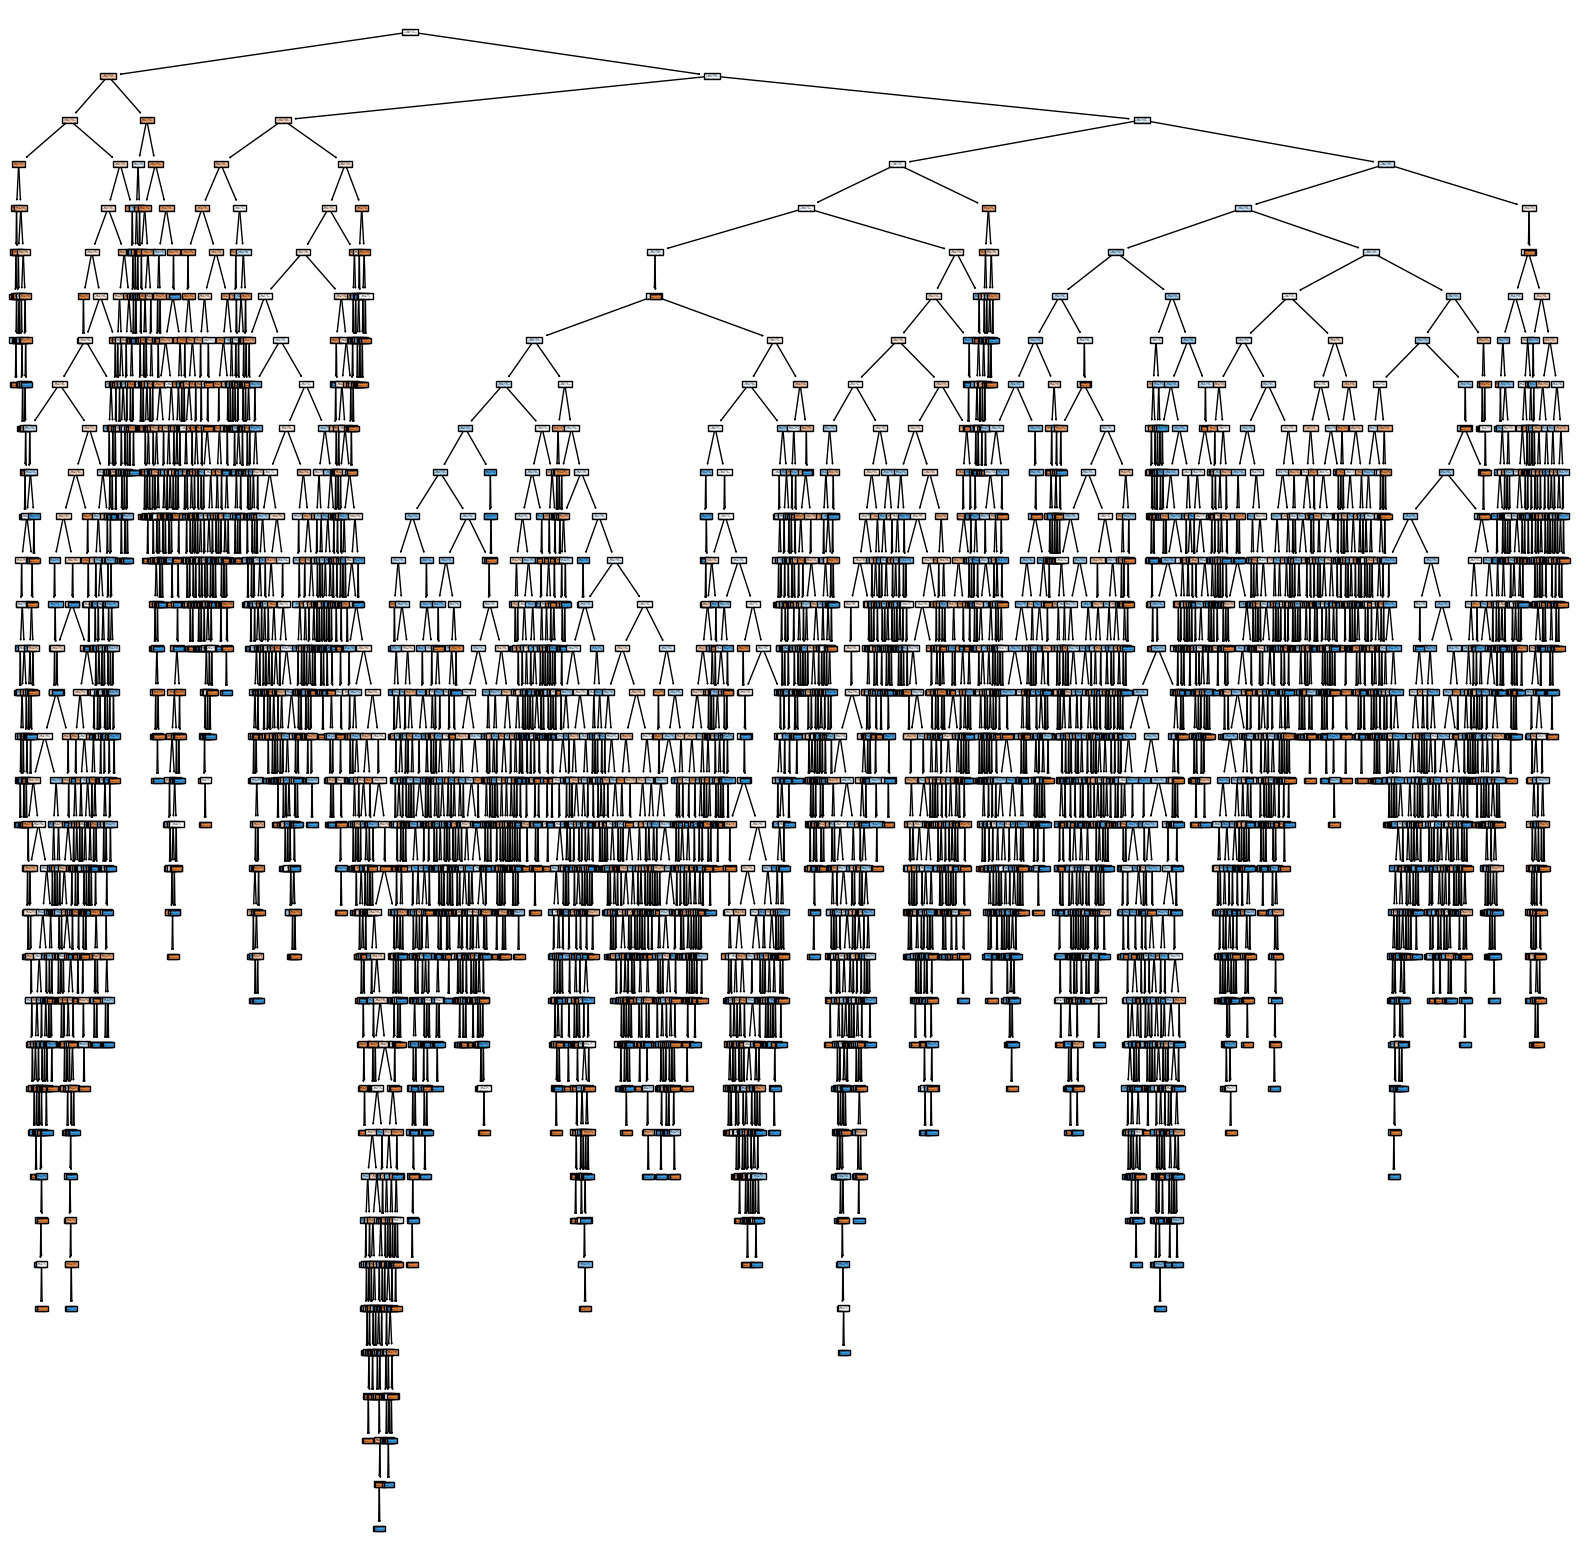

In [86]:

plt.figure(figsize=(20, 20))
plot_tree(drzewo1, filled=True)
plt.show()


In [24]:
path1 = drzewo1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas_ = path1.ccp_alphas
drzewa_ = []
for ccp_alpha1 in ccp_alphas_:
    drzewo1_ = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha1)
    drzewo1_.fit(X_train, y_train)
    drzewa_.append(drzewo1_)

In [62]:
ccp_alphas = ccp_alphas_[:-1]
print(ccp_alphas)

[0.00000000e+00 3.54660235e-05 4.66402501e-05 ... 1.63078843e-03
 2.06507422e-03 4.26559977e-03]


In [63]:
drzewa = drzewa_[:-1]

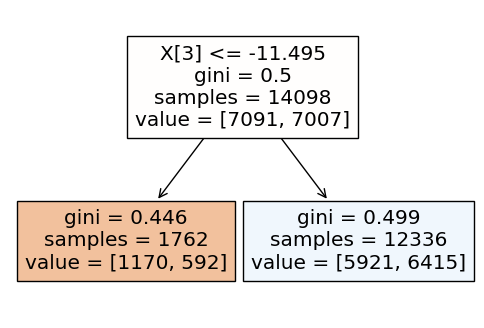

In [64]:
plt.figure(figsize=(6,4))
plot_tree(drzewa[-1], filled=True)
plt.show()

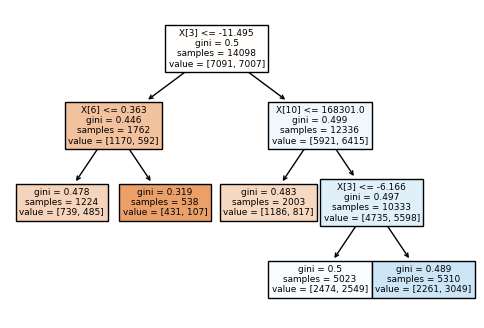

In [65]:
plt.figure(figsize=(6,4))
plot_tree(drzewa[-4], filled=True)
plt.show()

In [99]:
drzewo2 = drzewa[-1]
y_pred = drzewo2.predict(X_test)
accuracy = drzewo2.score(X_test, y_test)
print("Dokładność predykcji dla drzewa: {:.2f}%".format(accuracy*100))

Dokładność predykcji dla drzewa: 54.15%


In [100]:
drzewo3 = drzewa[-4]
y_pred - drzewo3.predict(X_test)
accuracy = drzewo3.score(X_test, y_test)
print("Dokładność predykcji dla drzewa: {:.2f}%".format(accuracy*100))

Dokładność predykcji dla drzewa: 56.14%


In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = {"ccp_alpha": [0.0001, 0.001, 0.1, 0.1, 1]}

grid_search = GridSearchCV(drzewo1, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_ccp_alpha = grid_search.best_params_["ccp_alpha"]

print("Najlepsza wartość ccp_alpha: {:.2f}".format(best_ccp_alpha))

Najlepsza wartość ccp_alpha: 0.00


In [102]:
drzewo4 = DecisionTreeClassifier(random_state=16, ccp_alpha = ccp_alpha1)
drzewo3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0010191254278764383, random_state=42)

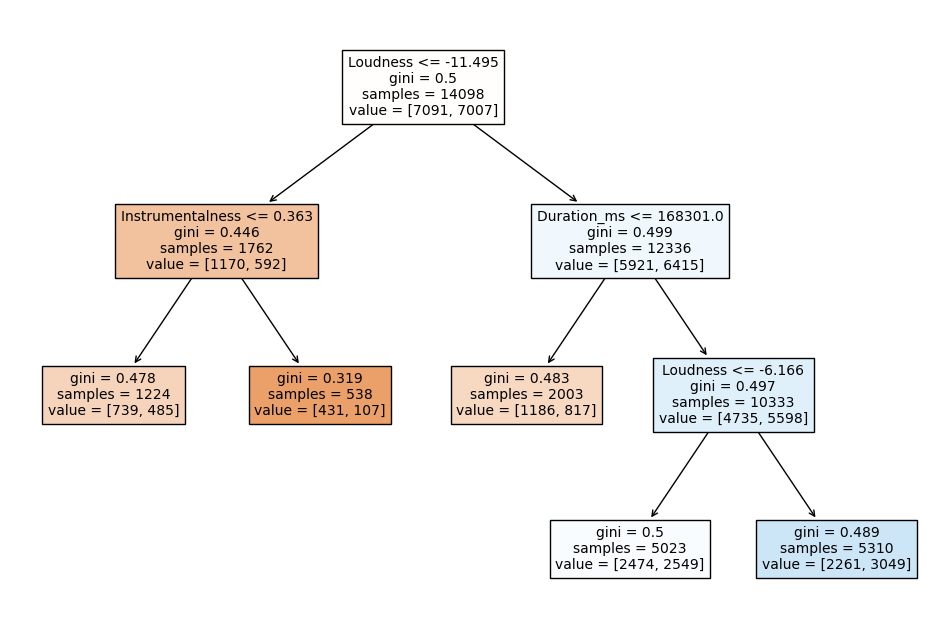

In [105]:
plt.figure(figsize=(12,8))
plot_tree(drzewo3, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

In [106]:
# feature_names = X.columns.tolist()
# X_train = X_train[X.columns]


In [107]:
from sklearn.metrics import accuracy_score

In [109]:
y_pred_train_ = drzewo3.predict(X_train)

accuracy_train_ = accuracy_score(y_train, y_pred_train_ )

print("Dokładność klasyfikacji na zbiorze uczącym: {:.2f}%".format(accuracy_train_*100))

Dokładność klasyfikacji na zbiorze uczącym: 56.42%


In [110]:
y_pred_test_ = drzewo3.predict(X_test)
accuracy_test_ = accuracy_score(y_test, y_pred_test_ )
print("Dokładność klasyfikacji na zbiorze testowym: {:.2f}%".format(accuracy_test_*100))


Dokładność klasyfikacji na zbiorze testowym: 56.14%


In [121]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_)

print("Macierz pomyłek:")
print(conf_matrix)

Macierz pomyłek:
[[ 990 1990]
 [ 660 2402]]


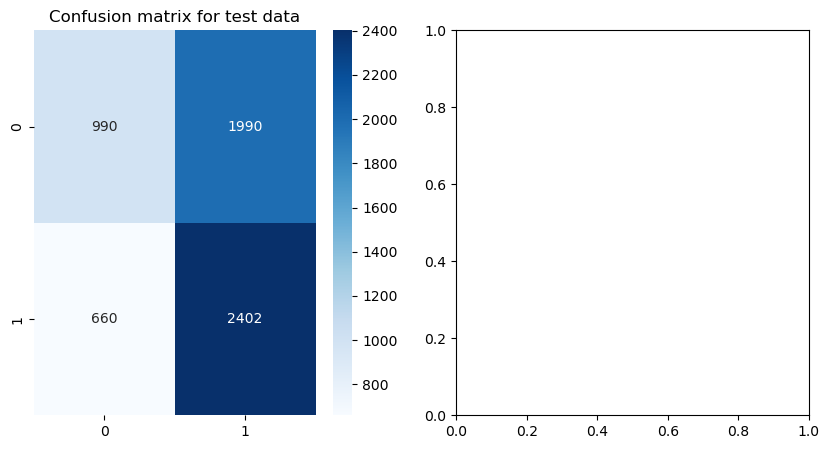

In [122]:
#jakaś ładniejsza macierz pomyłek
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', ax=axs[0], cmap="Blues")
axs[0].set_title('Confusion matrix for test data')

# sns.heatmap(cm_scoring, annot=True, fmt='d', ax=axs[1], cmap="Blues")
# axs[1].set_title('Confusion matrix for scoring data')

plt.show()


In [123]:
from sklearn.metrics import accuracy_score

error_rate = 1 - accuracy_score(y_test, y_pred_test_)
print("Odsetek błęnych klasyfikacji: {:.2f}%".format(error_rate*100))

Odsetek błęnych klasyfikacji: 43.86%


In [114]:
from sklearn.metrics import roc_curve

y_pred_t_proba = drzewo3.predict_proba(X_test)
y_pred_t_proba [0:3]

array([[0.49253434, 0.50746566],
       [0.49253434, 0.50746566],
       [0.42580038, 0.57419962]])

In [115]:
fpr, tpr, threshholds = roc_curve(y_test, y_pred_t_proba[:, 1])

for i, threshold in enumerate(threshholds):
    print("Threshold {:.2f}, FPR {:.2f}, TPR: {:.2f}".format(threshold, fpr[i], tpr[i]))

Threshold 1.57, FPR 0.00, TPR: 0.00
Threshold 0.57, FPR 0.33, TPR: 0.43
Threshold 0.51, FPR 0.67, TPR: 0.78
Threshold 0.41, FPR 0.83, TPR: 0.90
Threshold 0.40, FPR 0.94, TPR: 0.98
Threshold 0.20, FPR 1.00, TPR: 1.00


In [116]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_t_proba[:, 1])
print("Pole pod krzywą ROC: {:.2f}".format(roc_auc))


Pole pod krzywą ROC: 0.58


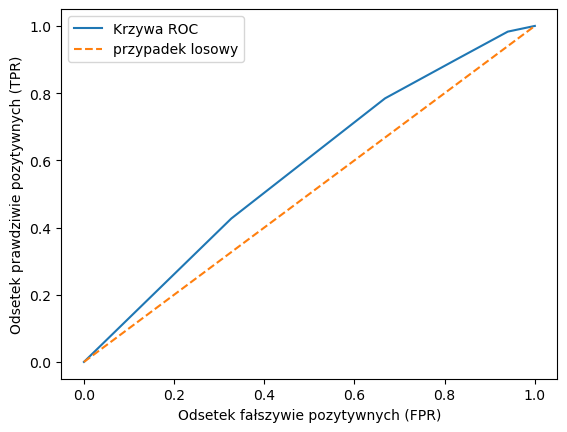

In [117]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='Krzywa ROC')
plt.plot([0,1], [0, 1], linestyle='--', label='przypadek losowy')

plt.xlabel("Odsetek fałszywie pozytywnych (FPR)")
plt.ylabel("Odsetek prawdziwie pozytywnych (TPR)")

plt.legend()
plt.show()

In [118]:
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['t_true'] = y_train
df_train['y_pred'] = y_pred_train_

df_train.head(100)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,t_true,y_pred
18339,0.546,0.6630,9.0,-6.071,0.0536,0.00938,0.000000,0.178,0.4070,171.698,282680.0,1,1
360,0.872,0.6810,0.0,-4.348,0.1100,0.04620,0.000014,0.129,0.4810,96.986,188009.0,0,1
13083,0.700,0.5540,1.0,-5.909,0.1870,0.21900,0.000001,0.419,0.0633,97.127,235187.0,1,1
14616,0.792,0.8240,6.0,-2.799,0.2590,0.02230,0.000000,0.103,0.7380,168.087,149613.0,0,0
13841,0.188,0.1580,1.0,-38.642,0.1230,0.89500,0.522000,0.112,0.0897,74.755,100001.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16402,0.830,0.5150,6.0,-5.942,0.4240,0.12900,0.000000,0.100,0.6920,95.209,222329.0,1,1
10512,0.620,0.7490,11.0,-4.398,0.0262,0.07290,0.000002,0.200,0.6800,116.031,219533.0,0,1
15908,0.899,0.4810,7.0,-9.116,0.2390,0.57100,0.000000,0.110,0.1390,130.018,144000.0,0,0
6751,0.162,0.0898,2.0,-23.269,0.0354,0.94400,0.917000,0.187,0.0413,132.047,169667.0,1,0


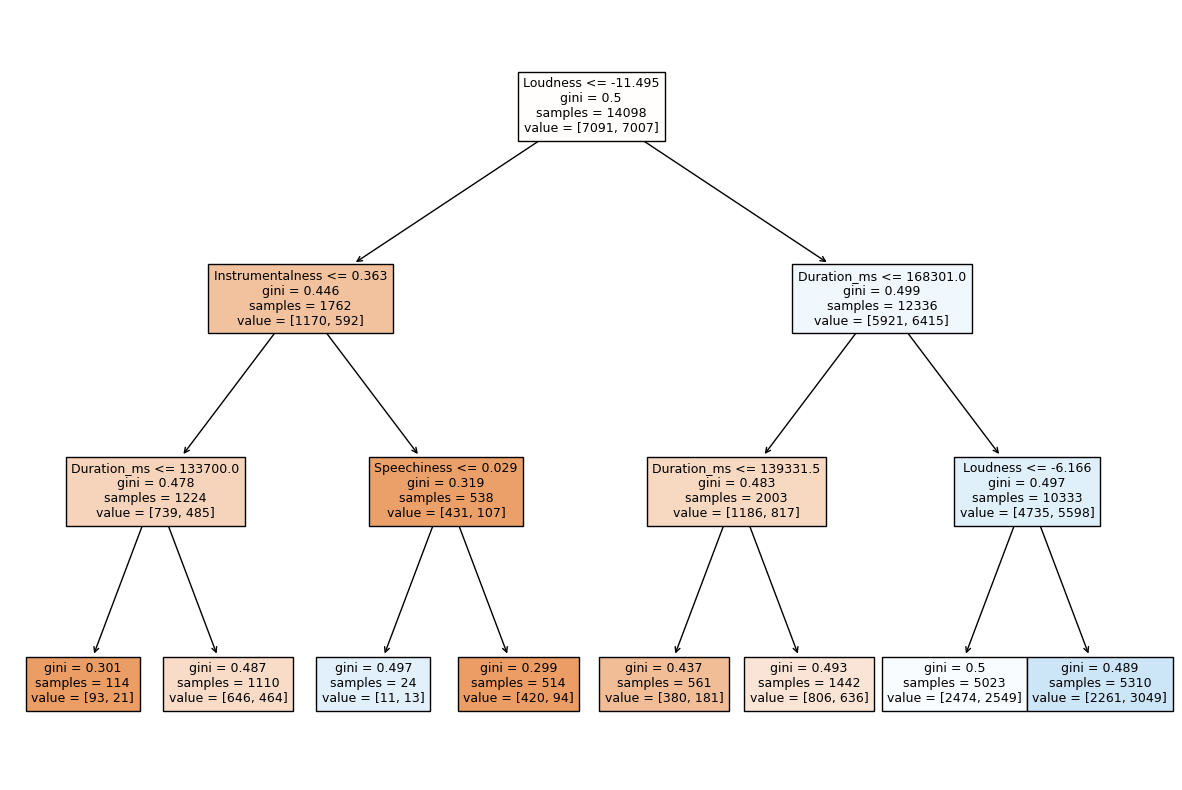

In [119]:
drzewo5 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=9)
drzewo5.fit(X_train, y_train)
plt.figure(figsize=(15,10))
plot_tree(drzewo5, filled=True, feature_names=X.columns, fontsize=9)
plt.show()